
 
 #  1.Exploratory Data Analysis : Haberman Data Set
 
 ## 1.1 Description 
 
  - EDA:Exploratory data analysis is the task of analysis of data using simple tools from statistics,plotting tools etc 
  - Data set:Haberman Cancer Survival dataset
  - EDA By:Berly Susan Babu
  - EDA on:15th April 2019
  
## 1.2 Haberman Cancer Survival Dataset 

  - Source:https://www.kaggle.com/gilsousa/habermans-survival-data-set
  - Variables:age,year,nodes
  - Class-label:status
  - Haberman data set contains details of the patients who undergone breast cancer surgery from 1958-1970 in University of           Chicago's Billings Hospital
  - Nodes in variables are the lymph nodes which are bean shaped,small clumps kind of filters in lymphatic system.The axillary       lymph node under the underarm is the first place where the cancel cells traps
  - Age in variables,shows the age of patients who undergone surgery
  - Year in variables, shows the year in which patient undergone surgery
  - Status in class-label,represents 1 when patient survived 5 years or more after surgery else 2
  - Objective:Predict the survival status of a new patient undergone surgery given 3 variables/features.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load haberman.csv into pandas dataframe
haberman=pd.read_csv("C://Users/626042/Desktop/MLAI/Module 2/haberman.csv")
print(haberman)


     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
7     34    59      0       2
8     34    66      9       2
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
24    38    69     21       2
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62      3       1
29    38    64      1       1
..   ...   ...    ...     ...
276   67    66      0       1
277   67  

In [3]:
#Shape of data,ie no: of datapoints in haberman datset

print(haberman.shape)

(306, 4)


__Observation__: 306 data points where imported which is having 4 attributes

In [4]:
#Labels of columns present in haberman dataset

print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


__Observation__: Able to see data type for each feature and class label

In [5]:
#Datapoints belongs to each status

print(haberman["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


__Observation__: There are 225 patients who survived for 5 years or more and 81 patients not survived atleast 5 years

## 1.3 Scatter plot:2D

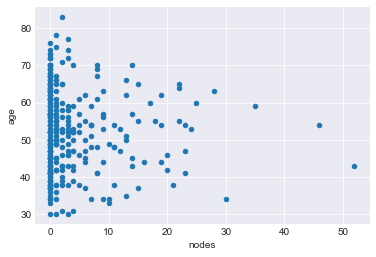

In [18]:
#2-D scatter plot:


haberman.plot(kind='scatter', x='nodes', y='age') ;
plt.show()



__Observation__: Not able to distinguish between datapoints since every point is of same color and overlapping

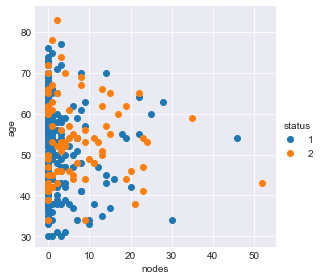

In [8]:
#2-D scatter plot with color coding for each type of datapoints

sns.set_style("darkgrid")
sns.FacetGrid(haberman,hue="status",size=4).map(plt.scatter,"nodes","age").add_legend()
plt.show()

__Observation__:Able to classify between survival more than  5 years and less than 5 years.Blue dots represents survival status 1 and orange dots represents survival status 2.But datapoints are over lapping,so seperating from each other is harder.

## 1.4 Pair Plot


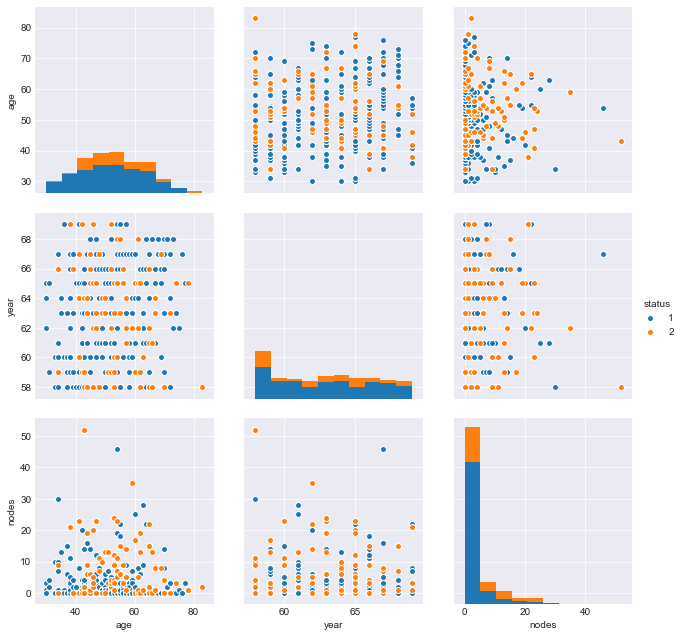

In [16]:
#Pair plot is a smart way to visualise plots between all features of data set as pairs
plt.close();
sns.set_style("darkgrid");
sns.pairplot(haberman,hue="status",size=3,vars=['age','year','nodes'])
plt.show()

__Observation__:
 - Plot 1,5,9 are histograms so we can vomit as of now
 - Plot 2 is between age of the patient and year of operation and it seems to me overlapping and not able to distinguish each      other.
 - Plot 4 also same which is 90 degree rotated form of plot 1.
 - Plot 3 is the plot between age of patient and no of axillary nodes.Overlapping is there but it is better than plot 2,plot 4
 - Plot 7 is the 90 degree rotated form of plot 3
 - Plot 6 is the plot between year of operation and nodes.Here overlapping points is almost similar like plot 2
 - Plot 8 is same like plot 6 with a 90 degree rotation
 - So for further analysis taking Plot 3

## 1.5 Histogram,PDF,CDF

### (1.5.1) 1 D Scatter Plot

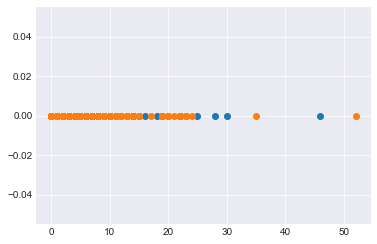

In [17]:
#1D Scatter plot-Plotting of each of the variables by seeting y axis as zero and x axis the intended feature for each class- label
#Below is the 1D scatter plot on nodes feature

haberman_one=haberman.loc[haberman["status"]==1]
haberman_two=haberman.loc[haberman["status"]==2]

#Plotting
plt.plot(haberman_one["nodes"], np.zeros_like(haberman_one['nodes']), 'o')
plt.plot(haberman_two["nodes"], np.zeros_like(haberman_two['nodes']), 'o')
plt.show()

__Observation__:Survival status is overlapping while plotted 1d scatter plot using axillary nodes feature.So cant classify data based on this.

### (1.5.2)Probability Density Function(PDF)

C:\Users\626042\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\626042\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


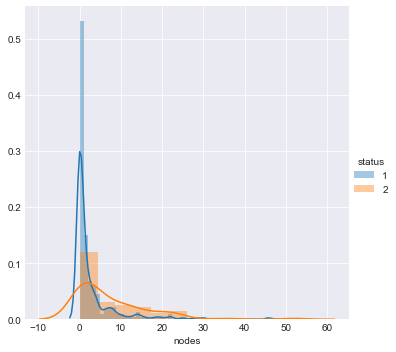

In [28]:
#pdf is the number of data point situated at a particular region 

sns.FacetGrid(haberman,hue='status',size=5).map(sns.distplot,'nodes').add_legend()
plt.show()

__Observation__:

 - For axillary node whose value less than 0 chance for survival is more
 - For axillary node value between 0-3 chances of survival is more
 - For axillary node value greater than 3 chances of survival of patient is less

C:\Users\626042\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\626042\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\626042\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\626042\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

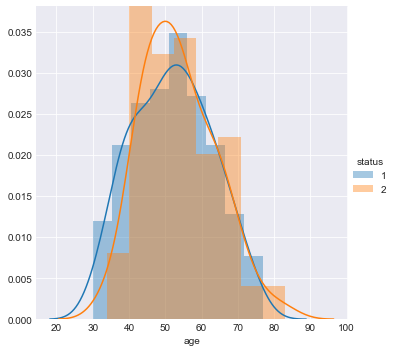

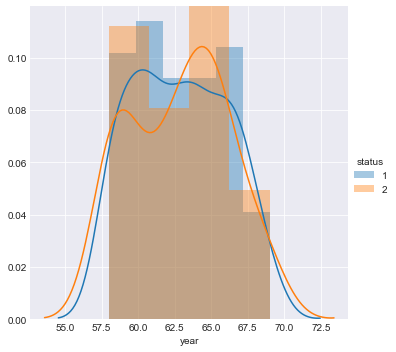

In [30]:
sns.FacetGrid(haberman,hue='status',size=5).map(sns.distplot,'age').add_legend()
sns.FacetGrid(haberman,hue='status',size=5).map(sns.distplot,'year').add_legend()
plt.show()

__Observation__:

 - Not able to distinguish between survival chances for the features age and year since it is showing almost same density at data points.So it is better to go with node numbers for further analysis

### (1.5.3)Cumilative distributive function(CDF)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


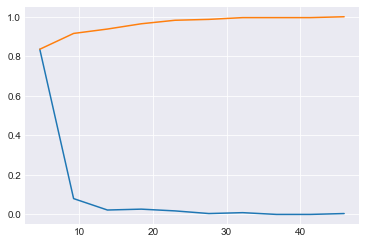

In [32]:
# CDF helps in calculating the percentage of people survived after surgery

#Below code evaluates cdf of patients surviving more,that is survival status one

counts, bin_edges = np.histogram(haberman_one['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

__Observation__:

 - 85% of patients having survival chances if the nodes detected is less than 5
 - 100 % of survived patients have nodes less than 40

     

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


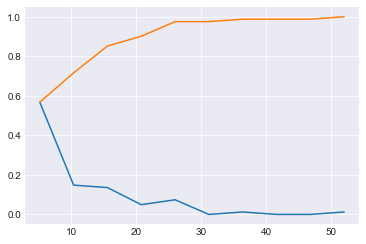

In [33]:


#Below code evaluates cdf of patients surviving less,that is survival status two

counts, bin_edges = np.histogram(haberman_two['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

__Observation__:

 - 55% of patients having survival chances less if the nodes detected is less than 5
 - 100 % patients having survival chances less if the nodes is greater than 35


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


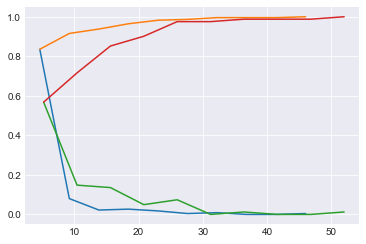

In [34]:
#CDF plotting together for more survival and less survival chances
counts, bin_edges = np.histogram(haberman_one['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(haberman_two['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();


__Observation__:

 - For a node number less than 5 survival chances of patients are far more.  
 - For node numbers from 5-25 survival chances is more
 - For node numbers from 25-35 slightly more chances of survival
 - For node numbers greater than 35,equal chances are for less survival and more survival


## 1.6 Mean, Variance and Std-dev

In [35]:
# Mean is the average of all data points
# Variance is the summation of  all data points deviation from its mean,that is spread.if spread is less data point will be closer to the mean 
# Standard deviation is the square root of mean
print("Means:")
print(np.mean(haberman_one["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_one["nodes"],50)));
print(np.mean(haberman_two["nodes"]))


print("\nStd-dev:");
print(np.std(haberman_one["nodes"]))
print(np.std(haberman_two["nodes"]))


Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


__Observation__:

 - For patients having less number of nodes survival chance is more even with outlier
 - For patients having more number of nodes survivaval chances is less

## 1.7 Median, Percentile, Quantile, IQR, MAD

In [37]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_one["nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_one["nodes"],50)));
print(np.median(haberman_two["nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_one["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_two["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_one["nodes"],90))
print(np.percentile(haberman_two["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_one["nodes"]))
print(robust.mad(haberman_two["nodes"]))




Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


__Observation__
   - Average nodes for the patients having more survival chances is 0 and while nodes are 4 for the patients having less              survival chances
   - Nearly 50% of nodes are 0 for the most survival patients and 75% of nodes are 3 for the patients who survived,that is 
     25% (75-50) people who survived having 3 nodes only.
   - Average nodes for the patients who survived less is 4
   - Nearly 25 % of nodes are 1 for those who didnt survive
   - Nearly 50% of nodes are 4 those who didnt survive,that is 25%(50-25) nodes where 4 for those who didnt survive
   - 75% of nodes are 11 for the patients who didnt survive,that is 25%(75-50) people who didnt survive having 11 nodes.
   - At 90th percentile patients having 8 nodes or less survived while 11 or more not survived.
   - Nodes of patients having most survival chance is 0 while calculating median absolute deviation whereas 
     almost 6 for  patients having less survival chance
   

## 1.8 Box plot and Whiskers(Univariate probability density)

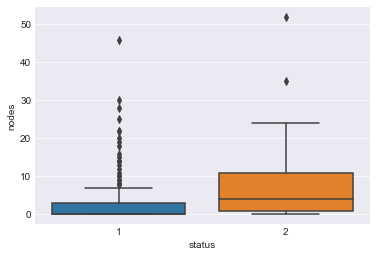

In [38]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitively.

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

__Observation__:
   
   - 50% and 25% of more survival patients are overlapping ,hence 50% of patients having more survival chance 
     if there nodes is 0
   - 75% having more survival chance if nodes are less than 4 
   - 25%-50% having less survival chance for the nodes less than 3.So there is a chance of getting error 
     while evaluating between 0-3 nodes
   - 75% having less survival chance for the nodes 0-11
   - Most of the points above 11 nodes lie in less survival chance patient
   

## 1.9 Violin Plot(Univariate probability density)

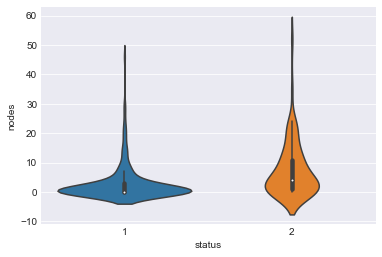

In [39]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='status',y='nodes', data=haberman, size=8)
plt.show()

__Observation__:
   
   - For the patients having more chances of survival most of the data points are located near 0 nodes and varies between 0-7
   - For the patients having less chances of survival most of the data points are located near 3 nodes and varies between 0-11

## 1.10 Contour Plot(Multivariate probability density)

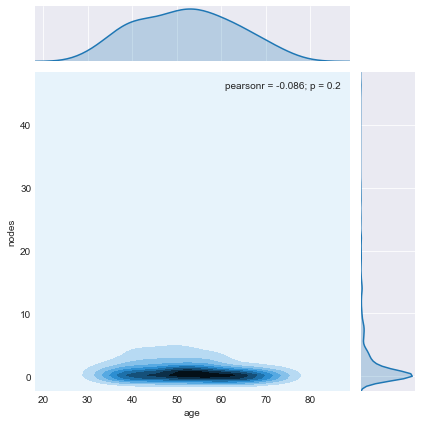

In [41]:
#Contour plot is a method of visualizing the  2-D scatter plot more intuitively
sns.jointplot(x="age", y="nodes", data=haberman_one, kind="kde");
plt.show();

__Observation__:
   
   - Density of plot is more for the age between 45-60 and having nodes 0-3 for the patients survived

## 1.11 Inference

  Able to detect the survival chance of a patient having cancer through EDA technique with the help of python libraries.